# KMeans (Unsupervised ML)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler=MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df),columns=iris.feature_names)

In [8]:
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [9]:
dt=df_scaled.drop(['sepal length (cm)','sepal width (cm)'],axis=1)
dt.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


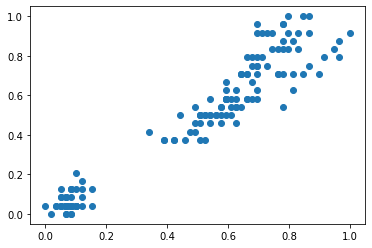

In [10]:
plt.scatter(dt['petal length (cm)'],dt['petal width (cm)'])

In [15]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
y_pred=km.fit_predict(dt[['petal length (cm)','petal width (cm)']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
dt['cluster']=y_pred
dt1=dt[dt.cluster==0]
dt2=dt[dt.cluster==1]

In [17]:
dt.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [18]:
dt1.head()

,petal length (cm),petal width (cm),cluster
50,0.627119,0.541667,0
51,0.593220,0.583333,0
52,0.661017,0.583333,0
53,0.508475,0.500000,0
54,0.610169,0.583333,0


In [19]:
dt2.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


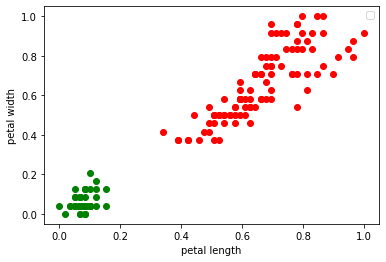

In [22]:
plt.scatter(dt1['petal length (cm)'],dt1['petal width (cm)'],color='red')
plt.scatter(dt2['petal length (cm)'],dt2['petal width (cm)'],color='green')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend( )


In [26]:
k_range=range(1,10,1)
SSE=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(dt[['petal length (cm)','petal width (cm)']])
    SSE.append(km.inertia_)

C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
SSE

[28.368353219727194,
 5.176463590044368,
 1.7018746881920963,
 1.1615234094205578,
 0.8538617353912238,
 0.6798101576314028,
 0.566867830638765,
 0.4858084553914369,
 0.41326677825124736]

Text(0, 0.5, 'SSE')

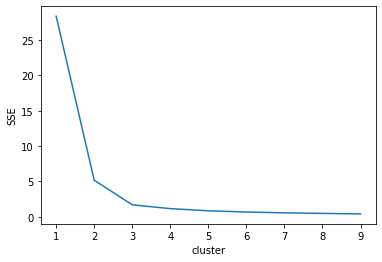

In [30]:
plt.plot(k_range,SSE)
plt.xlabel('cluster')
plt.ylabel('SSE')


In [31]:
#therefore the last elbow bend signifies that we have 3 clusters

In [32]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(dt[['petal length (cm)','petal width (cm)']])
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
dt.drop('cluster',axis=1,inplace=True)
dt

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


In [36]:
dt['Cluster']=y_pred
dt.head()

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,2
1,0.067797,0.041667,2
2,0.050847,0.041667,2
3,0.084746,0.041667,2
4,0.067797,0.041667,2


Text(0, 0.5, 'petal width')

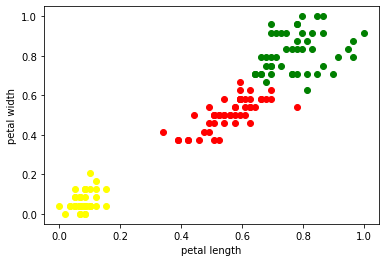

In [42]:
dt1=dt[dt.Cluster==0]
dt2=dt[dt.Cluster==1]
dt3=dt[dt.Cluster==2]


plt.scatter(dt1['petal length (cm)'],dt1['petal width (cm)'],color='red')
plt.scatter(dt2['petal length (cm)'],dt2['petal width (cm)'],color='green')
plt.scatter(dt3['petal length (cm)'],dt3['petal width (cm)'],color='yellow')
plt.xlabel('petal length')
plt.ylabel('petal width')